In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/COVID-19%20and%20its%20Impact%20on%20Students/COVID-19%20Survey%20Student%20Responses.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [4]:
data_v2 = data.drop(columns=['Stress busters', 'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most'])
data_v2.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO


In [5]:
data_v2.isnull().sum().sort_values(ascending=False)/len(data_v2)

Medium for online class              0.043147
Rating of Online Class experience    0.020305
ID                                   0.000000
Region of residence                  0.000000
Age of Subject                       0.000000
Time spent on Online Class           0.000000
Time spent on self study             0.000000
Time spent on fitness                0.000000
Time spent on sleep                  0.000000
Time spent on social media           0.000000
Prefered social media platform       0.000000
Time spent on TV                     0.000000
Number of meals per day              0.000000
Change in your weight                0.000000
Health issue during lockdown         0.000000
dtype: float64

In [6]:
df = pd.DataFrame(data_v2)
df_2 = df.dropna(subset=['Medium for online class'])
missing_val = df['ID'].count() - df_2['ID'].count()
print("There are", missing_val, "'NA' values")

There are 51 'NA' values


In [7]:
df_2.loc[df_2['Rating of Online Class experience'] == 'Very poor', 'Numeric Rating'] = '1'
df_2.loc[df_2['Rating of Online Class experience'] == 'Poor', 'Numeric Rating'] = '2'
df_2.loc[df_2['Rating of Online Class experience'] == 'Average', 'Numeric Rating'] = '3'
df_2.loc[df_2['Rating of Online Class experience'] == 'Good', 'Numeric Rating'] = '4'
df_2.loc[df_2['Rating of Online Class experience'] == 'Excellent', 'Numeric Rating'] = '5'
pd.to_numeric(df_2['Numeric Rating'])

0       4
1       5
2       1
3       1
4       4
       ..
1177    4
1178    3
1179    3
1180    5
1181    4
Name: Numeric Rating, Length: 1131, dtype: int64

In [8]:
conditions = [
    (df_2['Change in your weight'] == 'Increased'),
    (df_2['Change in your weight'] == 'Decreased'),
    (df_2['Change in your weight'] == 'Remain Constant')
]
values = ['1', '-1', '0']
df_2['Numeric Change in Weight'] = np.select(conditions, values)
pd.to_numeric(df_2['Numeric Change in Weight'])

0       1
1      -1
2       0
3      -1
4       0
       ..
1177   -1
1178    0
1179   -1
1180    0
1181    0
Name: Numeric Change in Weight, Length: 1131, dtype: int64

In [10]:
df_2['Health Issue (1 or 0)'] = df_2['Health issue during lockdown'].apply(lambda x: 1 if x == 'YES' else 0)
print(df_2['Health Issue (1 or 0)'])

0       0
1       0
2       0
3       0
4       0
       ..
1177    0
1178    0
1179    0
1180    0
1181    0
Name: Health Issue (1 or 0), Length: 1131, dtype: int64


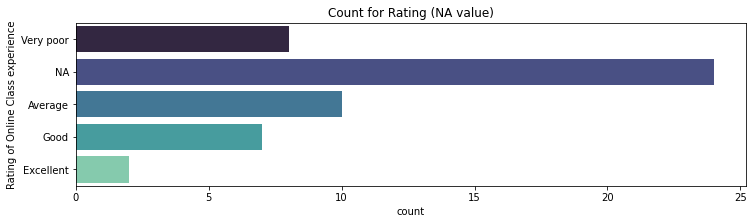

In [11]:
df_na = df[df['Medium for online class'].isna()]
plt.figure(figsize=(12,3))
fig1 = sns.countplot(y = 'Rating of Online Class experience', data = df_na.fillna('NA'), palette='mako')
fig1.set_title("Count for Rating (NA value)")
plt.show()

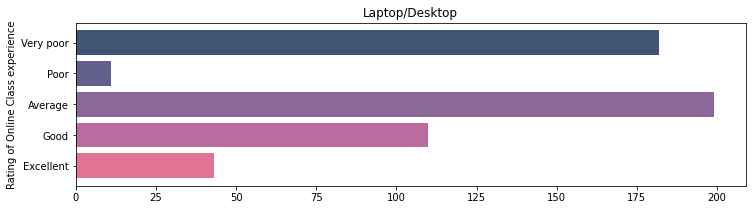

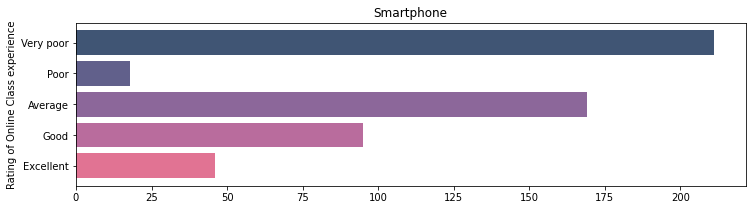

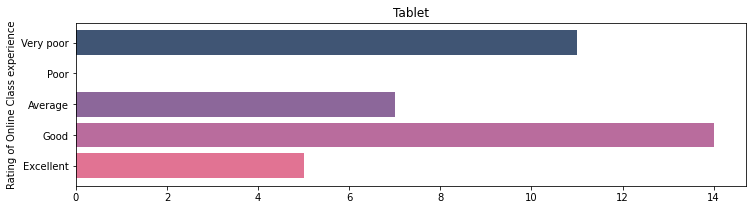

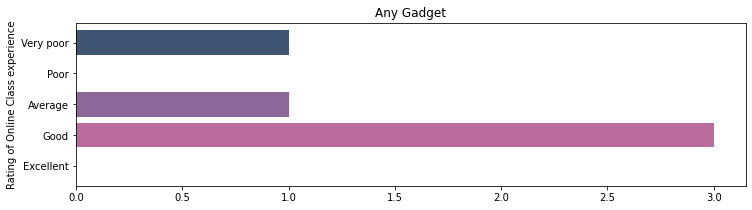

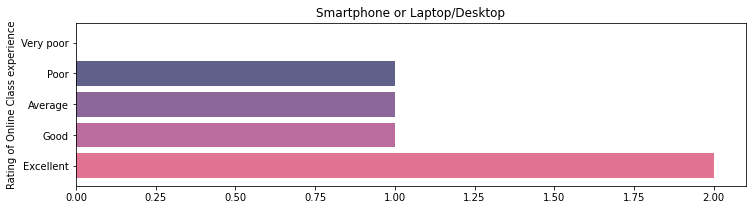

In [12]:
medium = df_2['Medium for online class'].unique()  
rating_index = ['Excellent','Good','Average','Poor','Very poor']
palette = ['#E17393', '#B96C9D', '#8C679A', '#61608B', '#405574']
for type in medium:
    ax=df_2.loc[(df_2['Medium for online class']== type)].groupby(by='Rating of Online Class experience').ID.count()
    ax.reindex(rating_index).plot.barh(title=type, width=0.8, color=palette, figsize=(12,3))
    plt.show()

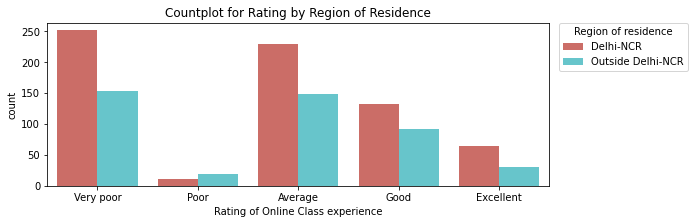

In [13]:
plt.figure(figsize = (9, 3))
fig2 = sns.countplot(x="Rating of Online Class experience", 
                     order=['Very poor', 'Poor', 'Average', 'Good', 'Excellent'],
                     hue="Region of residence", data=df_2, palette='hls')
fig2.set_title('Countplot for Rating by Region of Residence')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Region of residence', borderaxespad=0)

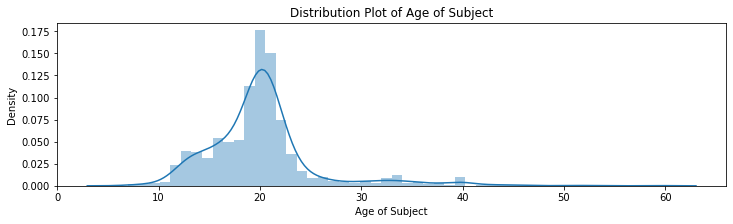

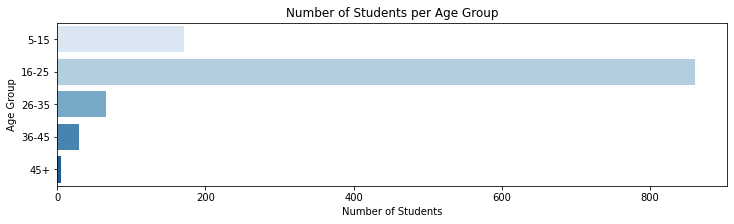

Text(0.5, 1.0, 'Boxplot of Rating by Age')

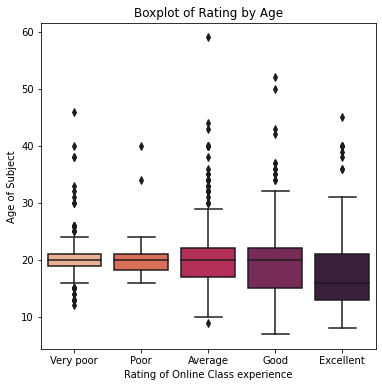

In [14]:
plt.figure(figsize = (12, 3))
sns.distplot(df_2['Age of Subject'])
plt.title('Distribution Plot of Age of Subject')
plt.show()
age_5_15 = df_2.loc[(df_2['Age of Subject'] >= 5) & (df_2['Age of Subject'] <= 15)]
age_16_25 = df_2.loc[(df_2['Age of Subject'] >= 16) & (df_2['Age of Subject'] <= 25)]
age_26_35 = df_2.loc[(df_2['Age of Subject'] >= 26) & (df_2['Age of Subject'] <= 35)]
age_36_45 = df_2.loc[(df_2['Age of Subject'] >= 36) & (df_2['Age of Subject'] <= 45)]
age_45above = df_2.loc[(df_2['Age of Subject'] >= 45)]
age_x = ['5-15', '16-25', '26-35', '36-45', '45+']
age_y = [len(age_5_15), len(age_16_25), len(age_26_35), len(age_36_45), len(age_45above)]
plt.figure(figsize=(12,3))
fig3 = sns.barplot(x=age_y, y=age_x, data=df_2, palette='Blues')
fig3.set_title("Number of Students per Age Group")
fig3.set_xlabel("Number of Students")
fig3.set_ylabel("Age Group")
plt.show()

plt.figure(figsize=(6, 6))
fig4 = sns.boxplot(x="Rating of Online Class experience", y="Age of Subject", data=df_2, 
                   order = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], 
                   palette='rocket_r')
fig4.set_title("Boxplot of Rating by Age")

Text(0.5, 1.0, 'Boxplot of Social Media Platform by Rating')

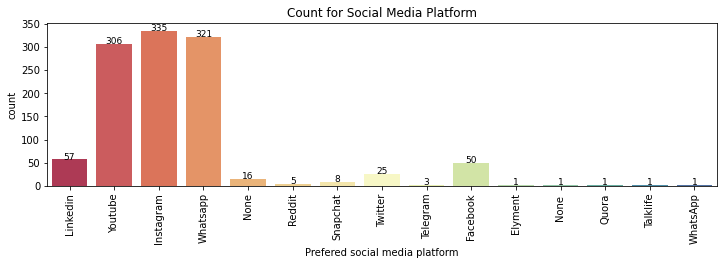

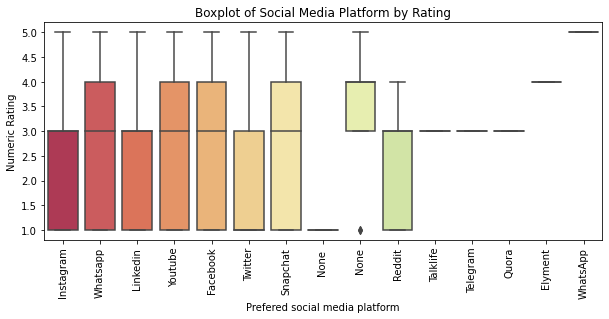

In [15]:
plt.figure(figsize = (12, 3))
fig5 = sns.countplot(x="Prefered social media platform", data=df_2, palette='Spectral')
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=90)
fig5.set_title("Count for Social Media Platform")
for rect in fig5.patches:
    fig5.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
             horizontalalignment='center', fontsize=9)

df_pi = df_2.sort_values(by='Numeric Rating', ascending=True)
df_pi['Numeric Rating'] = df_pi['Numeric Rating'].astype(int)
plt.figure(figsize = (10, 4))
fig6 = sns.boxplot(x="Prefered social media platform", y="Numeric Rating", data=df_pi, palette='Spectral')
fig6.set_xticklabels(fig6.get_xticklabels(), rotation=90)
fig6.set_title("Boxplot of Social Media Platform by Rating")

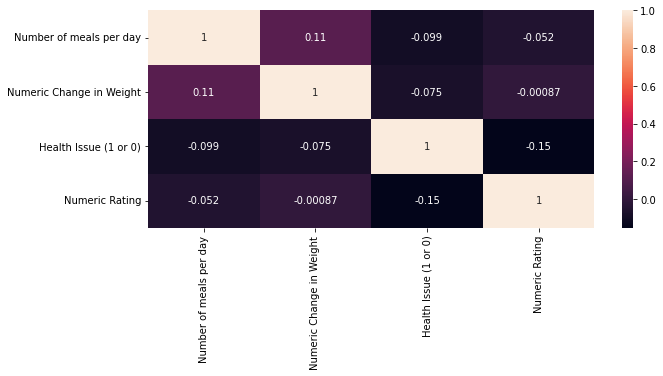

In [16]:
df_pi_num = df_2[['Number of meals per day', 'Numeric Change in Weight', 'Health Issue (1 or 0)', 'Numeric Rating']]
df_pi_num['Numeric Rating'] = df_pi_num['Numeric Rating'].astype(int)
df_pi_num['Numeric Change in Weight'] = df_pi_num['Numeric Change in Weight'].astype(int)
plt.figure(figsize = (10, 4))
sns.heatmap(df_pi_num.corr(), annot=True)
plt.show()